In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
file = pd.read_csv('marketing_customer_analysis.csv')
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
numerical = file.select_dtypes(include=np.number)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [4]:
categoricals = file.select_dtypes(include=object)
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


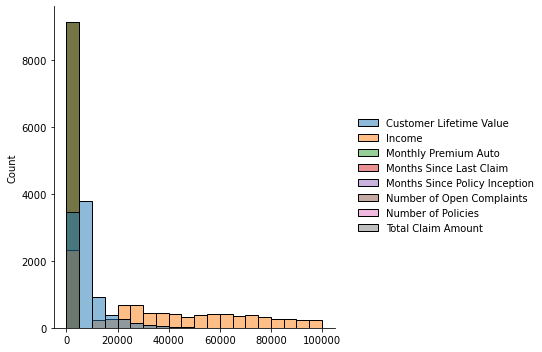

In [5]:
sns.displot(numerical, bins=20)
plt.show()

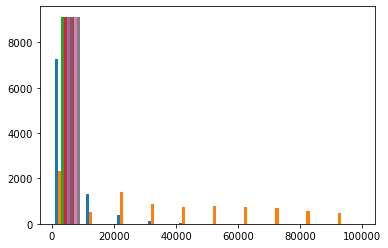

In [6]:
plt.hist(numerical, bins=10)
plt.show()

In [7]:
#Yes they're similar

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
vif_numerical = pd.DataFrame()
vif_numerical['feature'] = numerical.columns
vif_numerical["VIF"] = [(variance_inflation_factor(numerical.values, i)) 
                         for i in range(len(numerical.columns))]
vif_numerical

,feature,VIF
0,Customer Lifetime Value,2.806978
1,Income,2.831329
2,Monthly Premium Auto,14.130566
3,Months Since Last Claim,2.784766
4,Months Since Policy Inception,3.267760
5,Number of Open Complaints,1.166620
6,Number of Policies,2.299313
7,Total Claim Amount,6.666879


In [10]:
correlation_matrix = numerical.corr()
correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

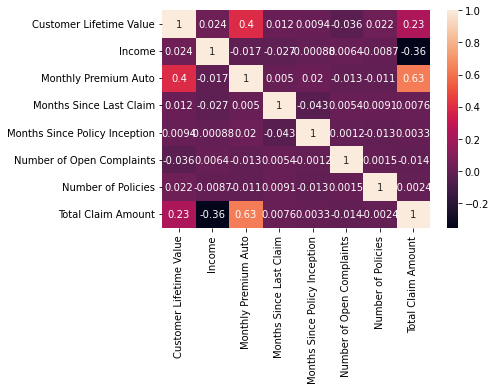

In [11]:
sns.heatmap(correlation_matrix, annot = True)

# LAB ROUND 5

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
X = file.drop(['Total Claim Amount'], axis = 1)
y = file['Total Claim Amount']


In [32]:
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(include='number')
X_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
X_cat = X_cat.drop(['Customer','Policy Type'], axis = 1)


In [34]:
X_cat.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [35]:
X_cat['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [23]:
X_num.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


In [24]:
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
X_normalized.head()

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


LAB ROUND 6

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
X_cat_encoded = onehot_encoded
X_cat_encoded

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
       '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
       '1/20/11', '1/21/11', '1/22/11', '1/23/11', '1/24/11', '1/25/11',
       '1/26/11', '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11',
       '1/31/11', '1/4/11', '1/5/11', '1/6/11', '1/7/11', '1/8/11',
       '1/9/11', '2/1/11', '2/10/11', '2/11/11', '2/12/11', '2/13/11',
       '2/14/11', '2/15/11', '2/16/11', '2/17/11', '2/18/11', '2/19/11',
       '2/2/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11', '2/24/11',
       '2/25/11', '2/26/11', '2/27/11', '2/28/11', '2/3/11', '2/4/11',
       '2/5/11', '2/6/11', '2/7/11', '2/8/11', '2/9/11'], dtype=object), array([

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
X_concat = pd.concat([X_normalized, X_cat_encoded], axis = 1)
X_concat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,California,Nevada,Oregon,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
X_train,X_test, y_train, y_test = train_test_split(X_concat,y, test_size=0.25, random_state=50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6850, 219)
(2284, 219)
(6850,)
(2284,)


In [58]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math

In [48]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
y_pred = lm.predict(X_test)
y_pred

0.7761480120516044


array([231.9375, 577.    , 377.625 , ...,  20.5   , 249.5625, 193.375 ])

In [49]:
print(mean_squared_error(y_pred,y_test))

19270.217652184623


In [59]:
from sklearn.metrics import r2_score

In [54]:
predictions = lm.predict(X_train)


r2_train = r2_score(y_train, predictions)
print('train R2:',r2_train) # 0 ,     0,5 to 1 = good


train R2: 0.7761480120516044


In [55]:
predictions2 = lm.predict(X_test)

r2_test = r2_score(y_test, predictions2)
print('test R2:', r2_test)

test R2: 0.7641202030306786


In [60]:
train_mse = mse(lm.predict(X_train), y_train)
print('train MSE:', train_mse)

train MSE: 19079.230204508494


In [61]:
test_mse = mse(lm.predict(X_test), y_test)
print('test MSE:', test_mse)

test MSE: 19270.217652184623


In [50]:
train_mse = mean_squared_error(lm.predict(X_train),y_train)
train_mse

19079.230204508494

In [51]:
test_mse = mean_squared_error(lm.predict(X_test), y_test)
test_mse

19270.217652184623

In [63]:
train_rmse = math.sqrt(train_mse)
print('train RMSE', train_rmse)

train RMSE 138.12758668893224


In [66]:
test_rmse = math.sqrt(test_mse)
print('test RMSE', test_rmse)

test RMSE 138.81720949574165


In [64]:
train_rmse = math.sqrt(train_mse)  
train_rmse                           

138.12758668893224

In [67]:
test_rmse = math.sqrt(test_mse)
test_rmse

138.81720949574165

In [70]:
train_mae = mean_absolute_error(lm.predict(X_train),y_train)
print('Train Mean Absolute Error:', train_mae)

Mean Absolute Error: 94.26879486890513


In [72]:
test_mae = mean_absolute_error(lm.predict(X_test), y_test)
print('Test Mean Absolute Error:', test_mae)

Test Mean Absolute Error: 96.80559595096324
